In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table

Station=Base.classes.station   
Measurement=Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
Base.metadata.create_all(engine)

session=Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date = session.query(Measurement.date).order_by(Measurement.date).first()
print(f'Start date: {start_date[0]}, Recent date:{recent_date[0]}')

Start date: 2010-01-01, Recent date:2017-08-23


In [ ]:
start_date = session.query(func.min(Measurement.date)).first()
start_date

('2010-01-01',)

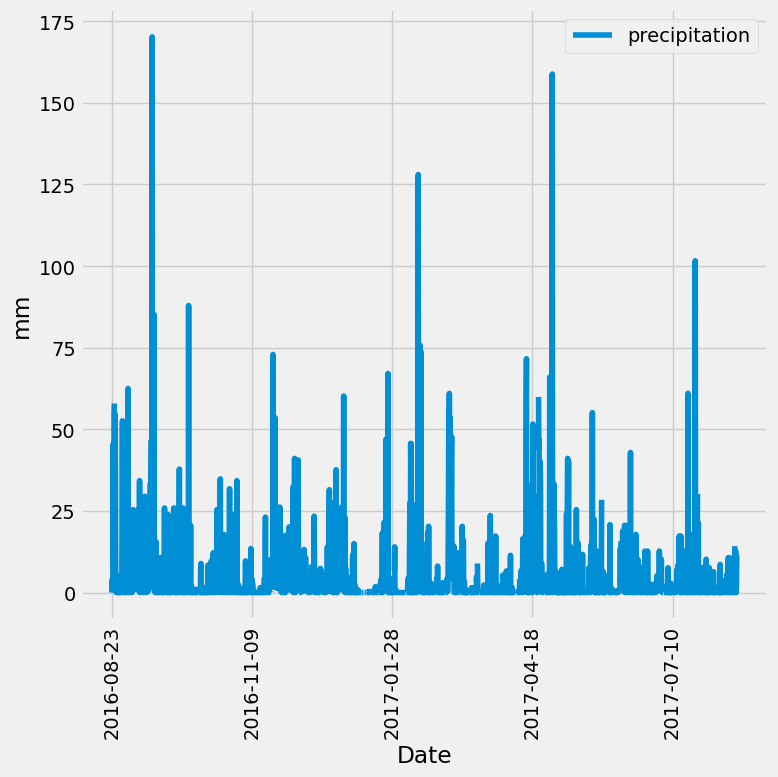

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Recent date=2017-08-23 and last 12 months will be after 2016-08-22

last_12_months=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by((Measurement.date).asc()).all()
last_12_months

# Save the query results as a Pandas DataFrame. Explicitly set the column names

last_12_months_df=pd.DataFrame(last_12_months)
last_12_months_df

prcp_12_data_rename = last_12_months_df.rename(columns={"prcp" : "precipitation"})

#Sort the dataframe by 'Date'
prcp_data_result=prcp_12_data_rename.set_index('date')


# Calculate the date one year from the last date in data set.
thedate_from_last_year=dt.date(2017,8,23)-dt.timedelta(days=365)
thedate_from_last_year

# Perform a query to retrieve the data and precipitation scores
data_scores=session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date).all()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_result.plot(figsize = (8, 8), alpha = 1.0);
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.tight_layout()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_result.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# The most active station id ='USC00519281' with 2772 the greatest number of observations
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_tobs=session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').filter(Measurement.station=='USC00519281').all()
last_12_months_tobs

last_12_months_df=pd.DataFrame(last_12_months_tobs)


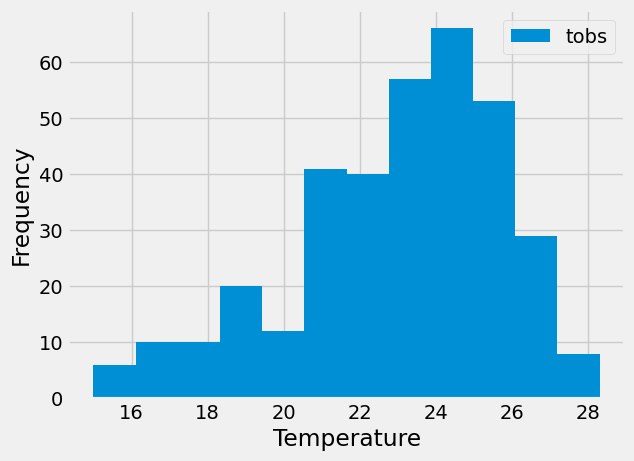

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_df.plot.hist(bins=12);
plt.xlabel('Temperature');

# Close Session

In [ ]:
# Close Session
session.close()